<a href="https://colab.research.google.com/github/Andrius-M/Lithuanian-parlament-votes/blob/master/Votes_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hello!**

**This is my data science project on Lithuanian parlament votes data set.**

Below you'll find some charts and usefull queries on this data set. 
Data set was taken from there: https://www.kaggle.com/sirexo/lithuanian-paliament-votes

In [1]:
!pip install -qq toai

     |████████████████████████████████| 81kB 2.3MB/s 
     |████████████████████████████████| 296kB 4.2MB/s 
     |████████████████████████████████| 552kB 5.5MB/s 
     |████████████████████████████████| 28.6MB 142kB/s 
     |████████████████████████████████| 102kB 9.0MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 747kB 40.1MB/s 


In [2]:
from toai.imports import *
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/toai/imports.py:79: UserWarning: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
  warnings.warn(str(error))


**Next few sections is about loading my votes.csv file from my Google Drive**

In [3]:
# https://www.youtube.com/watch?v=oqMImCeXi6o
# STEP-1: Import Libraries 
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
# STEP-2: Autheticate E-Mail ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
# STEP-3: Get File from Drive using file-ID
downloaded = drive.CreateFile({'id':'1Bz3Hn2r4RC7T6Vtqg1GGYXAenkpZLxea'}) # replace the id with id of file you want to access
downloaded.GetContentFile('votes.csv') 

In [ ]:
#!ls

In [7]:
df = pd.read_csv('votes.csv', low_memory=False)

In [10]:
#df.describe()

In [11]:
#df.isnull().any()
df = df.dropna()
#df.isnull().any()
#df.head()

In [12]:
df['time_yyyy_mm_dd'] = df['time'].str[:10]
df['time_yyyy'] = df['time'].str[:4]
df = df.sort_values('time_yyyy', ascending=True)
df.head()
#print(type(df))

,voting_id,voter_id,time,group,voter,question,sitting_type,vote,n_eligible_voters,n_voters,time_yyyy_mm_dd,time_yyyy
2646466,3818,231,1999-12-23 13:09:45,KDF,Stankevičius Česlovas Vytautas,dėl įstatymo priėmimo,rytinis,1.0,136,123,1999-12-23,1999
2650721,3773,101,1999-12-21 10:48:49,TSLK,Hofertienė Romualda,dėl įstatymo priėmimo,rytinis,1.0,136,67,1999-12-21,1999
2650720,3773,7220,1999-12-21 10:48:49,TSLK,Galdikas Juozas,dėl įstatymo priėmimo,rytinis,1.0,136,67,1999-12-21,1999
2650719,3773,267,1999-12-21 10:48:49,LDDP,Einoris Vytautas,dėl įstatymo priėmimo,rytinis,1.0,136,67,1999-12-21,1999
2650718,3773,7251,1999-12-21 10:48:49,TSLK,Daubaraitė Sofija,dėl įstatymo priėmimo,rytinis,1.0,136,67,1999-12-21,1999


**How many different parties we had during 1999-2017**

In [ ]:
df_uniq_parties = pd.unique(df['group'])
print("During 20 years in parlament we had "+str(len(df_uniq_parties))+" different parties. These are:"+str(df_uniq_parties).replace('[', '').replace(']', ''))

#print(type(df_uniq_parties))
#print(df_uniq_parties)

During 20 years in parlament we had 37 different parties. These are:'KDF' 'TSLK' 'LDDP' 'JF' 'CF' 'MG' 'SDF2000' 'SDF' 'NF' 'MKDF' 'SDKF'
 'NSF' 'LF' 'TSKF' 'NKF' 'JDTLF' 'VNDF' 'LDF' 'LCSF' 'JLF' 'LSDPF' 'TSF'
 'DPF' 'VLF' 'LSF' 'TTF' 'PDF' 'VLPD' 'TS-LKDF' 'TPPF' 'AŽF' 'KPF' 'DKF'
 'LLRAF' 'LLRA-KŠSF' 'LVŽSF' 'LSDDF'


**How many different parlamanet members we had during 1999-2017**

In [ ]:
df_uniq_voters = pd.unique(df['voter'])
print("During 20 years in parlament we had "+str(len(df_uniq_voters))+" different parlament members")

#print(type(df_uniq_voters))
#df_uniq_voters_count = pd.unique(df['voter']).size()
#print(df_uniq_voters_count)

During 20 years in parlament we had 525 different parlament members


**Amount of unique and total questions during 1999-2017**

In [15]:
#df_uniq_quest = pd.unique(df['question'])
df_uniq_quest = pd.unique(df['question'])
df_total_quest = pd.unique(df['voting_id'])
print("During 20 years in parlament we had "+str(len(df_uniq_quest))+" different questions for voting. Total amount of questions was: "+str(len(df_total_quest)))

#print(df_uniq_quest[100:105])
#print(type(df_uniq_quest))
#print(df_uniq_voters[1:100])

During 20 years in parlament we had 11647 different questions for voting. Total amount of questions was: 38132


**Number of parties during each years in the period of 1999 - 2017**

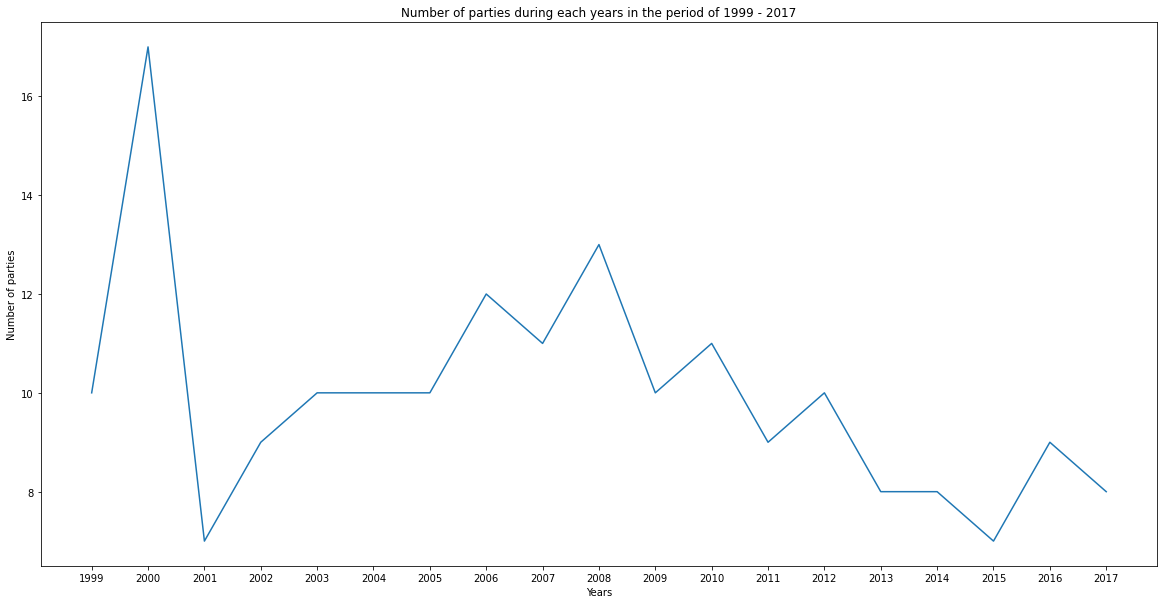

In [16]:
q_df = df.groupby('time_yyyy')['group'].nunique()

plt.figure(figsize=(20,10))
plt.title("Number of parties during each years in the period of 1999 - 2017")
plt.xlabel("Years")
plt.ylabel("Number of parties")
sns.lineplot(data=q_df, label='')

#print(q_df.head(5))

**How many each type of sittings in total during all period (1999-2017)**


In [17]:
# How many each type of sittings were over the years

#sitting_type - one of:
#rytinis - In the morning
#vakarinis - In the evening
#neeilinis - Additional
#nenumatytas - Not Planned 

df_sitting_type_morning = df.where(df['sitting_type'] == 'rytinis')
df_sitting_type_evening = df.where(df['sitting_type'] == 'vakarinis')
df_sitting_type_additional = df.where(df['sitting_type'] == 'neeilinis')
df_sitting_type_not_planed = df.where(df['sitting_type'] == 'nenumatytas')

#df_sitting_type_morning.isnull().any()
#df_sitting_type_additional = df_sitting_type_additional.dropna()
#df_sitting_type_morning.isnull().any()

#df_sitting_type_morning_count = pd.unique(df_sitting_type_morning['voting_id'])
#df_sitting_type_evening_count = pd.unique(df_sitting_type_evening['voting_id'])
#df_sitting_type_additional_count = pd.unique(df_sitting_type_additional['voting_id'])
#df_sitting_type_not_planed_count = pd.unique(df_sitting_type_not_planed['voting_id'])

df_sitting_type_morning_count = df_sitting_type_morning['voting_id'].value_counts()
df_sitting_type_evening_count = df_sitting_type_evening['voting_id'].value_counts()
df_sitting_type_additional_count = df_sitting_type_additional['voting_id'].value_counts()
df_sitting_type_not_planed_count = df_sitting_type_not_planed['voting_id'].value_counts()

print("Morning sittings in total: "+str(len(df_sitting_type_morning_count)))
print("Evening sittings in total: "+str(len(df_sitting_type_evening_count)))
print("Additional sittings in total: "+str(len(df_sitting_type_additional_count)))
print("Not Planned sittings in total: "+str(len(df_sitting_type_not_planed_count)))

#df_sitting_type_additional.head(100)
#print(type(df_sitting_type_additional))
#print(df_sitting_type_additional)

Morning sittings in total: 22681
Evening sittings in total: 13119
Additional sittings in total: 2181
Not Planned sittings in total: 151


**How many each type of sittings were over the years**

In [20]:
# How many each type of sittings were over the years

mor = df_sitting_type_morning.groupby('time_yyyy')['voting_id'].nunique()
mor = mor.to_frame().rename(columns={'voting_id': 'Morning'})

eve = df_sitting_type_evening.groupby('time_yyyy')['voting_id'].nunique()
eve = eve.to_frame().rename(columns={'voting_id': 'Evening'})

add = df_sitting_type_additional.groupby('time_yyyy')['voting_id'].nunique()
add = add.to_frame().rename(columns={'voting_id': 'Additional'})

nPlan = df_sitting_type_not_planed.groupby('time_yyyy')['voting_id'].nunique()
nPlan = nPlan.to_frame().rename(columns={'voting_id': 'NotPlanned'})

df_merged = pd.concat([mor, eve, add, nPlan], axis=1).reset_index()

#df_merged.isnull().any()
#df_merged.dropna()
#df_merged.isnull().any()

df_merged.set_index('index', inplace=True)
# print(df_merged)

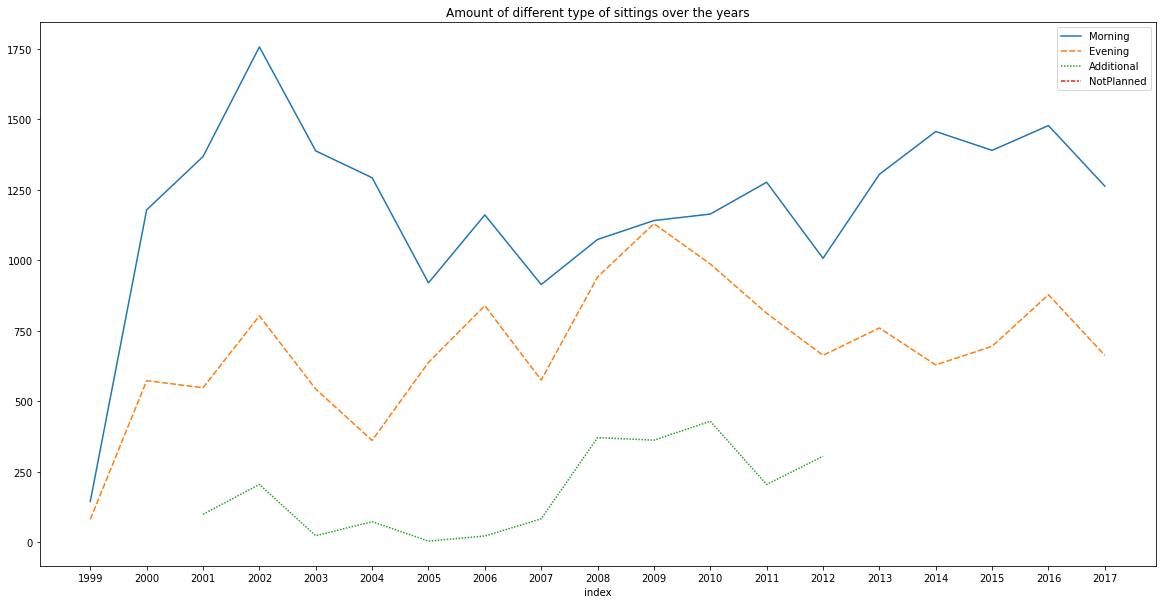

In [22]:
plt.figure(figsize=(20,10))
plt.title("Amount of different type of sittings over the years")
plt.xlabel("gggggg")
plt.ylabel("")
sns.lineplot(data=df_merged)

**How many votes in total were during the period (1999-2017) for each type of sittings**

In [23]:
print(df.sitting_type.value_counts())

rytinis        1725460
vakarinis       861458
neeilinis       163529
nenumatytas      12104
Name: sitting_type, dtype: int64


**Riddle!!! Don't look to the code and try guess what is this chart about :)**

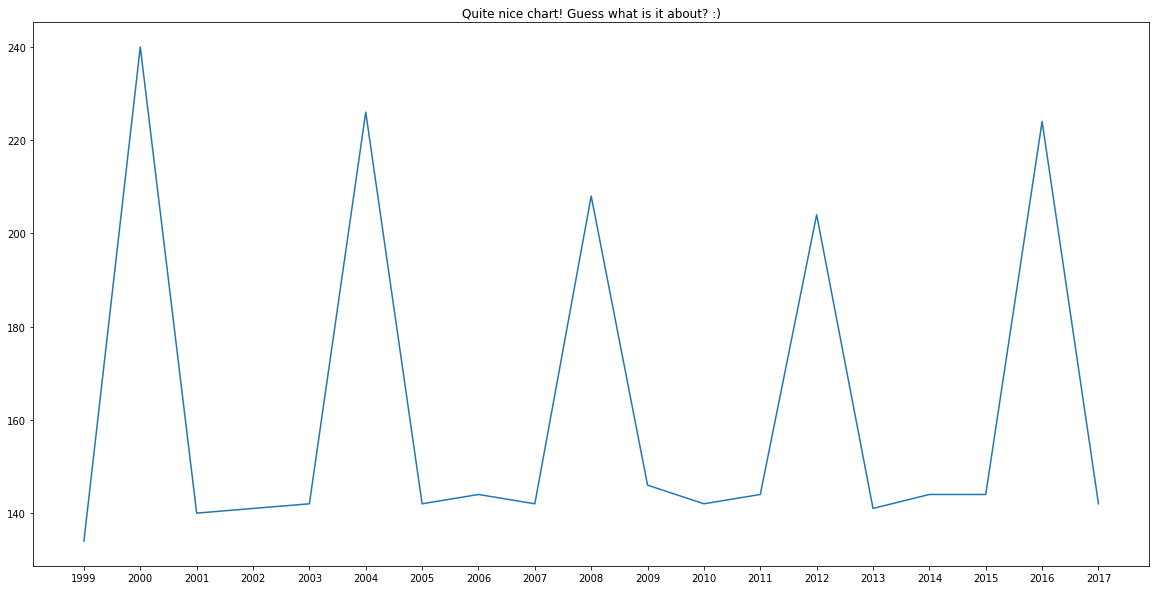

In [24]:
# Riddle!!!
q_df = df.groupby('time_yyyy')['voter'].nunique()
plt.figure(figsize=(20,10))
plt.title("Quite nice chart! Guess what is it about? :)")
sns.lineplot(data=q_df, label='')

**Total amount of votings per years**

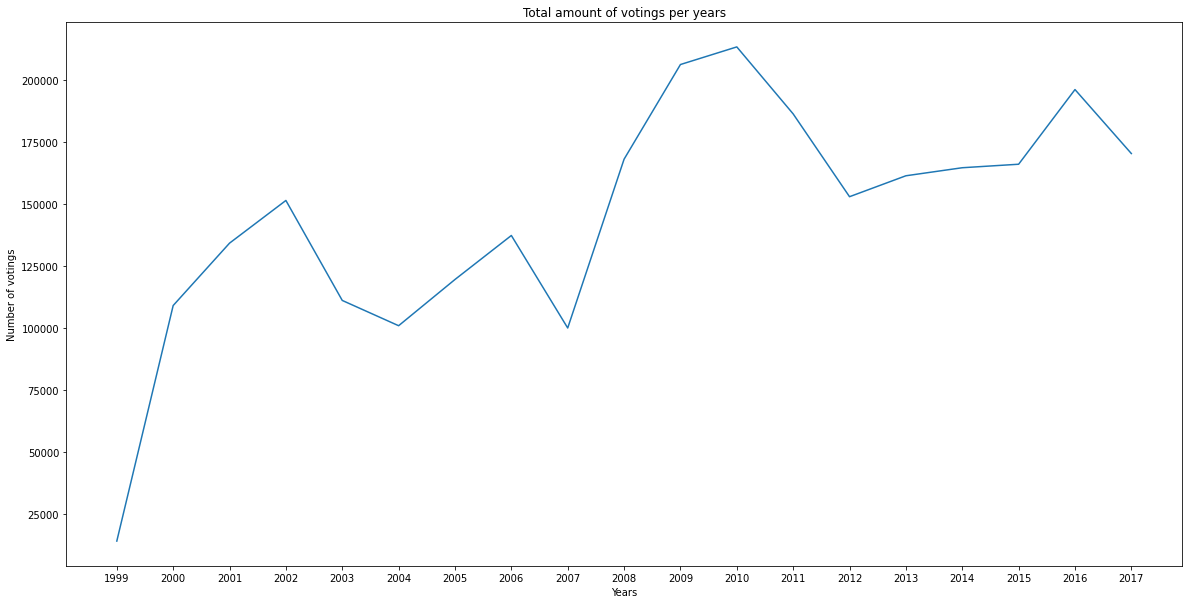

In [25]:
votes = df.groupby('time_yyyy').voter.count()

plt.figure(figsize=(20,10))
plt.title("Total amount of votings per years")
plt.xlabel("Years")
plt.ylabel("Number of votings")
sns.lineplot(data=votes, label='')

**To which political party does a member of the Parlament belongs?**

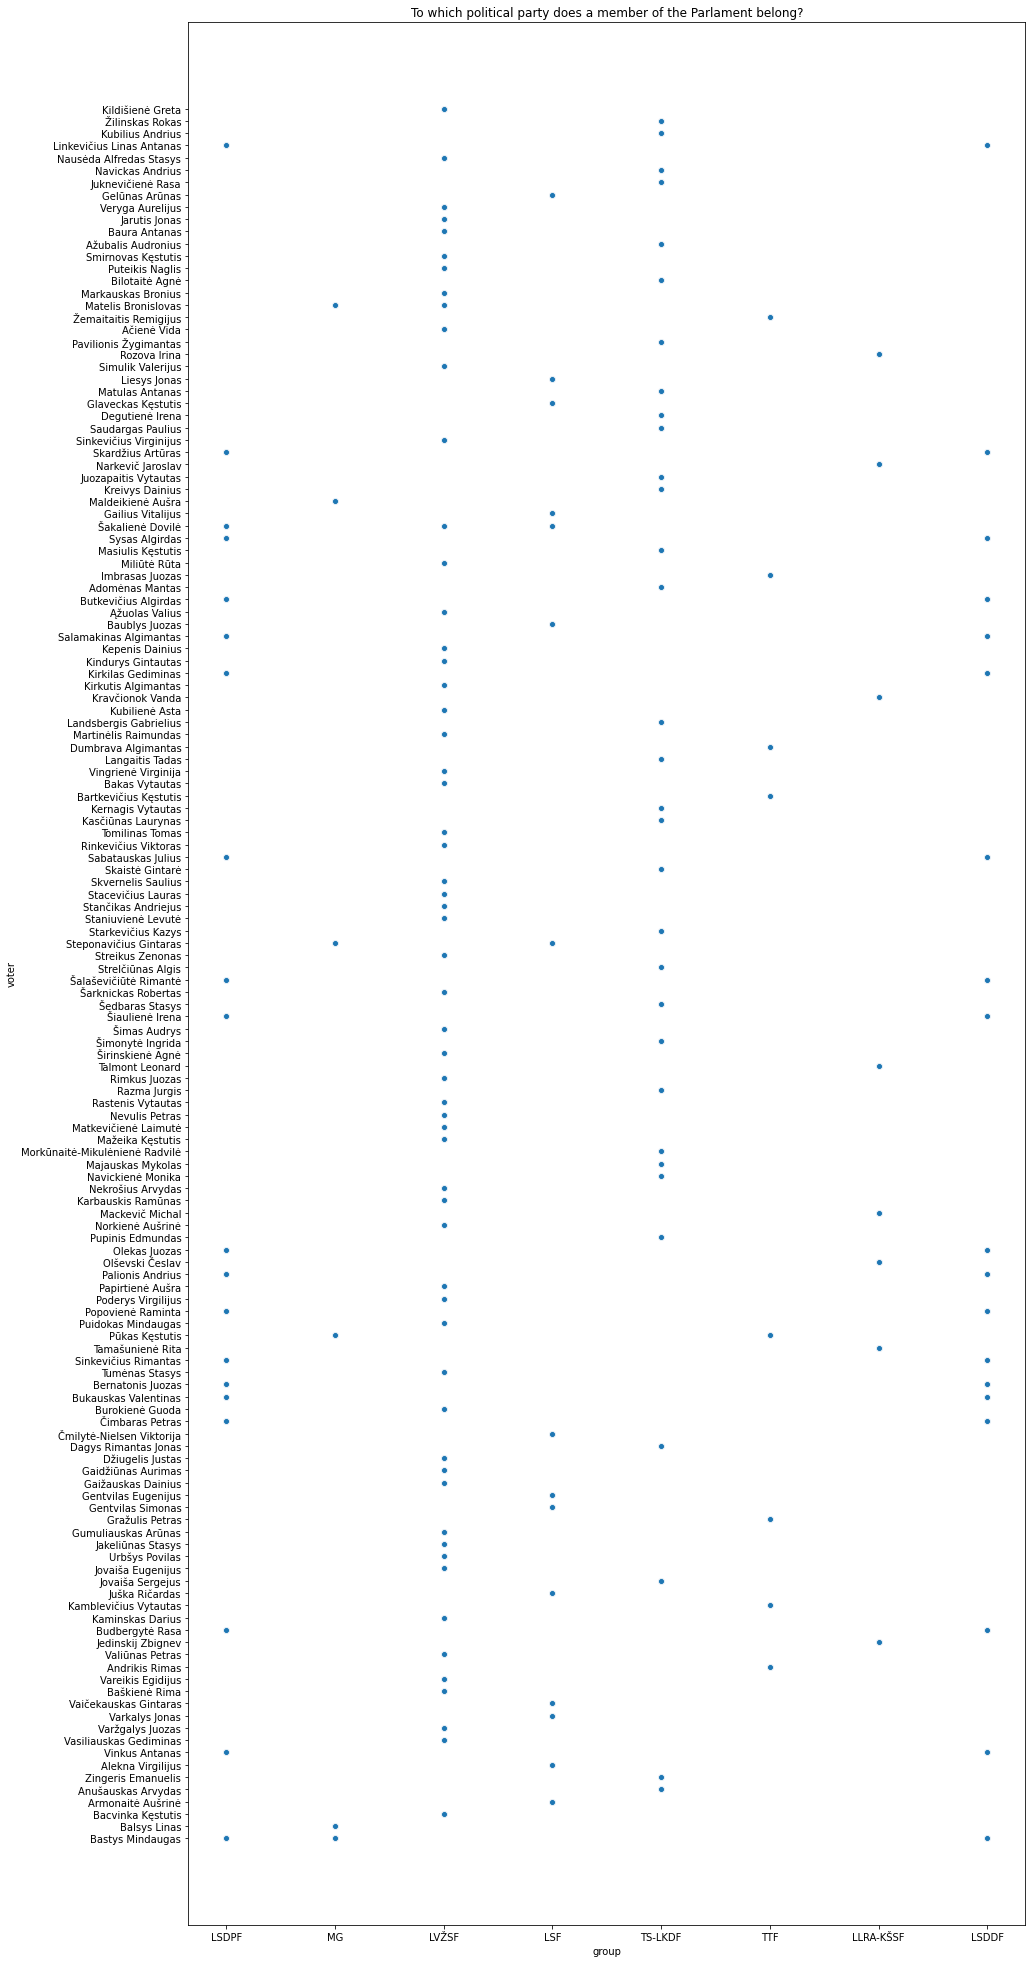

In [26]:
df_scatter = df.where(df['time_yyyy'] == '2017')
plt.figure(figsize=(15,35))
plt.title("To which political party does a member of the Parlament belong?")
plt.xlabel("")
plt.ylabel("")
sns.scatterplot(x=df_scatter['group'], y=df_scatter['voter'])

**I've made a list of Parlament members who was elected to Parlament and worked during all this period (1999-2017)**

In [27]:
####
# this section:
# - create dataframes for each year with unique voters
# - convert dataframes to lists 
# - use map and set.intesection to get unique voters that appears each year
####

only_2017 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2017')
only_2017 = only_2017['voter'].unique()
only_2016 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2016')
only_2016 = only_2016['voter'].unique()
only_2015 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2015')
only_2015 = only_2015['voter'].unique()
only_2014 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2014')
only_2014 = only_2014['voter'].unique()
only_2013 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2013')
only_2013 = only_2013['voter'].unique()
only_2012 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2012')
only_2012 = only_2012['voter'].unique()
only_2011 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2011')
only_2011 = only_2011['voter'].unique()
only_2010 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2010')
only_2010 = only_2010['voter'].unique()
only_2009 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2009')
only_2009 = only_2009['voter'].unique()
only_2008 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2008')
only_2008 = only_2008['voter'].unique()
only_2007 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2007')
only_2007 = only_2007['voter'].unique()
only_2006 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2006')
only_2006 = only_2006['voter'].unique()
only_2005 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2005')
only_2005 = only_2005['voter'].unique()
only_2004 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2004')
only_2004 = only_2004['voter'].unique()
only_2003 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2003')
only_2003 = only_2003['voter'].unique()
only_2002 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2002')
only_2002 = only_2002['voter'].unique()
only_2001 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2001')
only_2001 = only_2001['voter'].unique()
only_2000 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2000')
only_2000 = only_2000['voter'].unique()
only_1999 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '1999')
only_1999 = only_1999['voter'].unique()
'''
only_1998 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '1998')
only_1998 = only_1998['voter'].unique()
only_1997 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '1997')
only_1997 = only_1997['voter'].unique()
'''
a_only_2017 = only_2017.tolist()
a_only_2016 = only_2016.tolist()
a_only_2015 = only_2015.tolist()
a_only_2014 = only_2014.tolist()
a_only_2013 = only_2013.tolist()
a_only_2012 = only_2012.tolist()
a_only_2011 = only_2011.tolist()
a_only_2010 = only_2010.tolist()
a_only_2009 = only_2009.tolist()
a_only_2008 = only_2008.tolist()
a_only_2007 = only_2007.tolist()
a_only_2006 = only_2006.tolist()
a_only_2005 = only_2005.tolist()
a_only_2004 = only_2004.tolist()
a_only_2003 = only_2003.tolist()
a_only_2002 = only_2002.tolist()
a_only_2001 = only_2001.tolist()
a_only_2000 = only_2000.tolist()
a_only_1999 = only_1999.tolist()
'''
a_only_1998 = only_1998.tolist()
a_only_1997 = only_1997.tolist()
'''
# https://stackoverflow.com/questions/57210753/find-common-values-in-multiple-lists 
#elements_in_all = list(set.intersection(*map(set, [a_only_2017, a_only_2016, a_only_2015, a_only_2014, a_only_2013, a_only_2012, a_only_2011, a_only_2010, a_only_2009, a_only_2008, a_only_2007, a_only_2006, a_only_2005, a_only_2004, a_only_2003, a_only_2002, a_only_2001, a_only_2000, a_only_1999, a_only_1998, a_only_1997])))

elements_in_all = list(set.intersection(*map(set, [a_only_2017, a_only_2016, a_only_2015, a_only_2014, a_only_2013, a_only_2012, a_only_2011, a_only_2010, a_only_2009, a_only_2008, a_only_2007, a_only_2006, a_only_2005, a_only_2004, a_only_2003, a_only_2002, a_only_2001, a_only_2000, a_only_1999])))
print(elements_in_all)

#['Salamakinas Algimantas', 'Degutienė Irena', 'Gražulis Petras', 'Glaveckas Kęstutis', 'Razma Jurgis', 'Olekas Juozas', 'Butkevičius Algirdas', 'Sysas Algirdas', 'Šiaulienė Irena', 'Kirkilas Gediminas', 'Kubilius Andrius']

['Kirkilas Gediminas', 'Olekas Juozas', 'Degutienė Irena', 'Juknevičienė Rasa', 'Gražulis Petras', 'Salamakinas Algimantas', 'Sysas Algirdas', 'Glaveckas Kęstutis', 'Šiaulienė Irena', 'Butkevičius Algirdas', 'Razma Jurgis', 'Kubilius Andrius']


**Line plot of Voting Activity of Parlament members who was elected to Parlament and worked during all this period (1999-2017)**

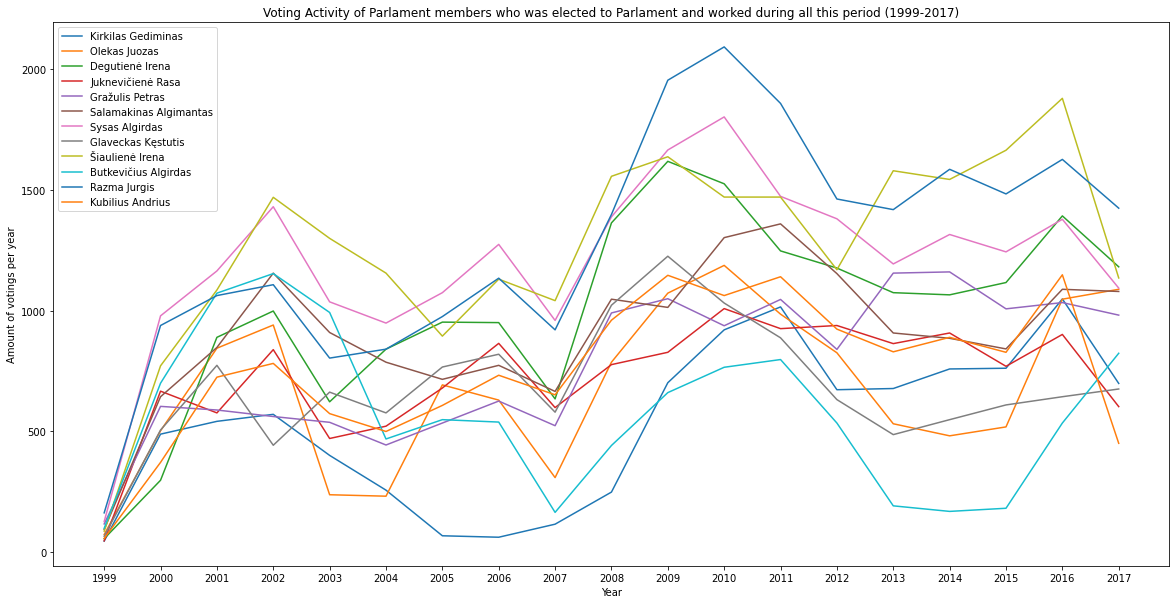

In [29]:
#['Salamakinas Algimantas', 'Degutienė Irena', 'Gražulis Petras', 'Glaveckas Kęstutis', 'Razma Jurgis', 'Olekas Juozas', 'Butkevičius Algirdas', 'Sysas Algirdas', 'Šiaulienė Irena', 'Kirkilas Gediminas', 'Kubilius Andrius']
#members1 = list(['Salamakinas Algimantas', 'Degutienė Irena', 'Gražulis Petras', 'Glaveckas Kęstutis', 'Razma Jurgis', 'Olekas Juozas', 'Butkevičius Algirdas', 'Sysas Algirdas', 'Šiaulienė Irena', 'Kirkilas Gediminas', 'Kubilius Andrius'])
#members1 = list(['Landsbergis Gabrielius'])

members1 = elements_in_all

df1 = pd.DataFrame()
all = pd.DataFrame()
for i in members1:
  df1[i] = df[df['voter'] == i].groupby(['time_yyyy']).size()#.reset_index(name='voter')
  all = all.append(df1[i], ignore_index=True)

all['vardai'] = members1
all.reset_index()

plt.figure(figsize=(20,10))
plt.title("Voting Activity of Parlament members who was elected to Parlament and worked during all this period (1999-2017)")
plt.xlabel("Year")
plt.ylabel("Amount of votings per year")

all_1 = all.drop(columns='vardai') #pasidarom DataFrame'ą tik iš skaičių išmesdami stulpelį 'vardai'

#print(all_1.iloc[2])
#print(type(all_1.iloc[2]))

for i in range(len(all)):
  sns.lineplot(data=all_1.iloc[i], label=all.iloc[i]['vardai'])

#print(all_1)

**Heatmap of Voting Activity of Parlament members who was elected to Parlament and worked during all this period (1999-2017)**

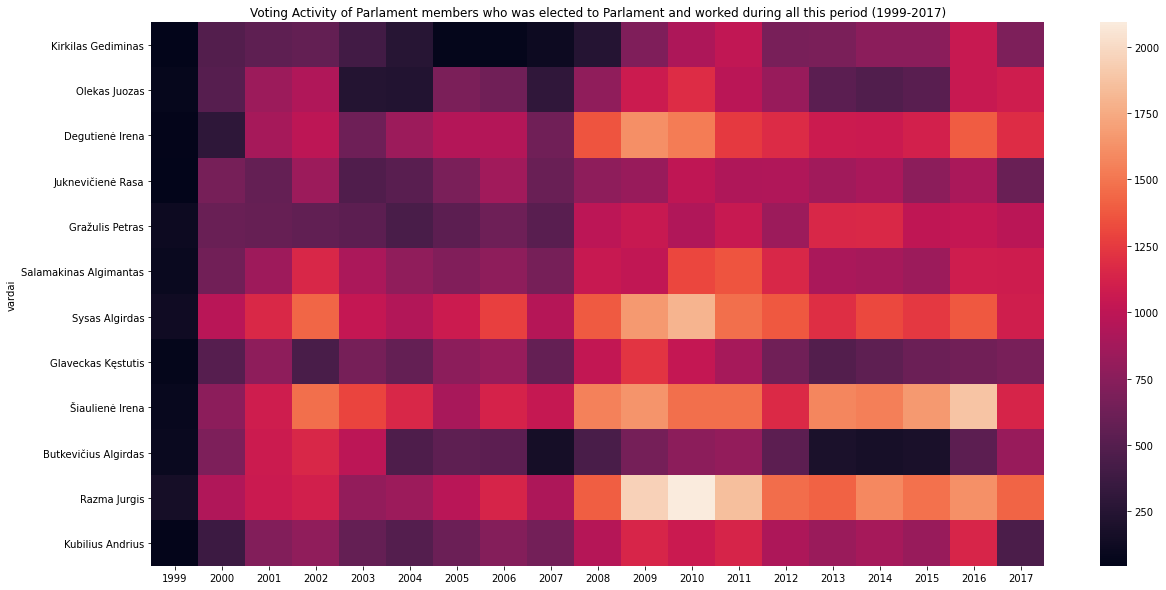

In [31]:
total_votes = all
total_votes.set_index('vardai', inplace=True)
votes1 = total_votes
#total_votes['Total'] = all.sum(axis=1)

plt.figure(figsize=(20,10))
plt.title("Voting Activity of Parlament members who was elected to Parlament and worked during all this period (1999-2017)")#
plt.xlabel("Years")
plt.ylabel("Number of votes per year")
sns.heatmap(data=votes1, annot=False)

**Votes amout of parlament member in %**

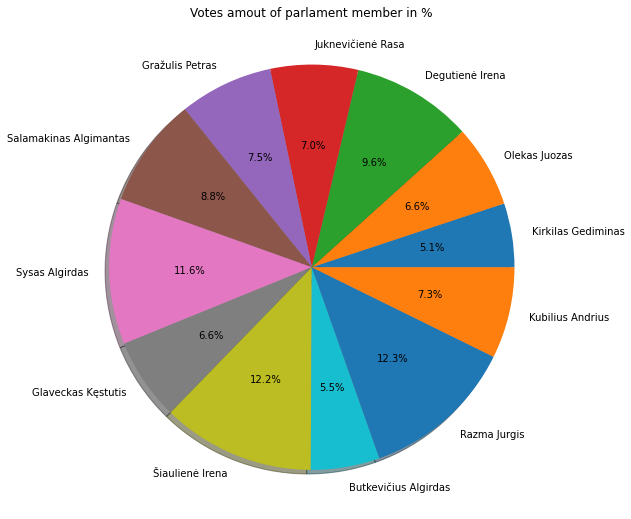

In [32]:
total_votes['Total'] = all.sum(axis=1)
sizes = total_votes['Total']
sizes_df = pd.DataFrame({'voter':sizes.index, 'Total':sizes.values})

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=sizes_df['voter'], autopct='%1.1f%%', shadow=True)
fig1.set_size_inches(8,9)
ax1.axis('equal')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Votes amout of parlament member in %')

plt.show()

**PARLAMENTS ACCORDING OFFITIAL BEGINNING AND END DATES**

In [ ]:
# Parlament begining and the end  
# https://apps.lrs.lt/sip/p2b.ad_seimo_kadencijos
'''
<SeimoInformacija pavadinimas="Seimo kadencijos" suformavimo_laikas="2020-07-29 18:46:16" šaltinis="www.lrs.lt" tiekėjas="Seimo kanceliarija" licencija="CC BY 4.0">
<SeimoKadencija kadencijos_id="1" pavadinimas="1990–1992 metų kadencija" data_nuo="1990-03-10" data_iki="1992-11-22"/>
<SeimoKadencija kadencijos_id="2" pavadinimas="1992–1996 metų kadencija" data_nuo="1992-11-24" data_iki="1996-11-22"/>
<SeimoKadencija kadencijos_id="3" pavadinimas="1996–2000 metų kadencija" data_nuo="1996-11-25" data_iki="2000-10-18"/>
<SeimoKadencija kadencijos_id="4" pavadinimas="2000–2004 metų kadencija" data_nuo="2000-10-19" data_iki="2004-11-14"/>
<SeimoKadencija kadencijos_id="5" pavadinimas="2004–2008 metų kadencija" data_nuo="2004-11-15" data_iki="2008-11-16"/>
<SeimoKadencija kadencijos_id="6" pavadinimas="2008–2012 metų kadencija" data_nuo="2008-11-17" data_iki="2012-11-16"/>
<SeimoKadencija kadencijos_id="7" pavadinimas="2012–2016 metų kadencija" data_nuo="2012-11-16" data_iki="2016-11-14"/>
<SeimoKadencija kadencijos_id="8" pavadinimas="2016–2020 metų kadencija" data_nuo="2016-11-14" data_iki=""/>
</SeimoInformacija>
...

'\n1996-11-25 - 2000-10-18 \n2000-10-19 - 2004-11-11\n2004-11-15 \n2008-10-12 +men\n2012-10-28 +men\n2016-10-23 +men\n'

**Parlaments and amounts of members in them**

In [36]:
df_S_90 = df[(df['time_yyyy_mm_dd'] > '1990-03-10') & (df['time_yyyy_mm_dd'] < '1992-11-22')].sort_values(by='time',ascending=True)
uniq_90 = pd.unique(df_S_90['voter'])
df_S_92 = df[(df['time_yyyy_mm_dd'] > '1992-11-24') & (df['time_yyyy_mm_dd'] < '1996-11-22')].sort_values(by='time',ascending=True)
uniq_92 = pd.unique(df_S_92['voter'])
df_S_96 = df[(df['time_yyyy_mm_dd'] > '1996-11-25') & (df['time_yyyy_mm_dd'] < '2000-10-18')].sort_values(by='time',ascending=True)
uniq_96 = pd.unique(df_S_96['voter'])
df_S_00 = df[(df['time_yyyy_mm_dd'] > '2000-10-19') & (df['time_yyyy_mm_dd'] < '2004-11-14')].sort_values(by='time',ascending=True)
uniq_00 = pd.unique(df_S_00['voter'])
df_S_04 = df[(df['time_yyyy_mm_dd'] > '2004-11-15') & (df['time_yyyy_mm_dd'] < '2008-11-16')].sort_values(by='time',ascending=True)
uniq_04 = pd.unique(df_S_04['voter'])
df_S_08 = df[(df['time_yyyy_mm_dd'] > '2008-11-17') & (df['time_yyyy_mm_dd'] < '2012-11-16')].sort_values(by='time',ascending=True) 
uniq_08 = pd.unique(df_S_08['voter'])
df_S_12 = df[(df['time_yyyy_mm_dd'] > '2012-11-16') & (df['time_yyyy_mm_dd'] < '2016-11-14')].sort_values(by='time',ascending=True) 
uniq_12 = pd.unique(df_S_12['voter'])
df_S_16 = df[(df['time_yyyy_mm_dd'] > '2016-11-14')].sort_values(by='time',ascending=True) 
uniq_16 = pd.unique(df_S_16['voter'])

print('Amount of parlament members in each')
print('Amount in 1990`th parlament: '+str(len(uniq_90)))
print('Amount in 1992`th parlament: '+str(len(uniq_92)))
print('Amount in 1996`th parlament: '+str(len(uniq_96)))
print('Amount in 2000`th parlament: '+str(len(uniq_00)))
print('Amount in 2004`th parlament: '+str(len(uniq_04)))
print('Amount in 2008`th parlament: '+str(len(uniq_08)))
print('Amount in 2012`th parlament: '+str(len(uniq_12)))
print('Amount in 2016`th parlament: '+str(len(uniq_16)))

Amount of parlament members in each
Amount in 1990`th parlament: 0
Amount in 1992`th parlament: 0
Amount in 1996`th parlament: 138
Amount in 2000`th parlament: 149
Amount in 2004`th parlament: 150
Amount in 2008`th parlament: 152
Amount in 2012`th parlament: 150
Amount in 2016`th parlament: 142


**How many unique votings parties participated during Parlament 2012-2016**

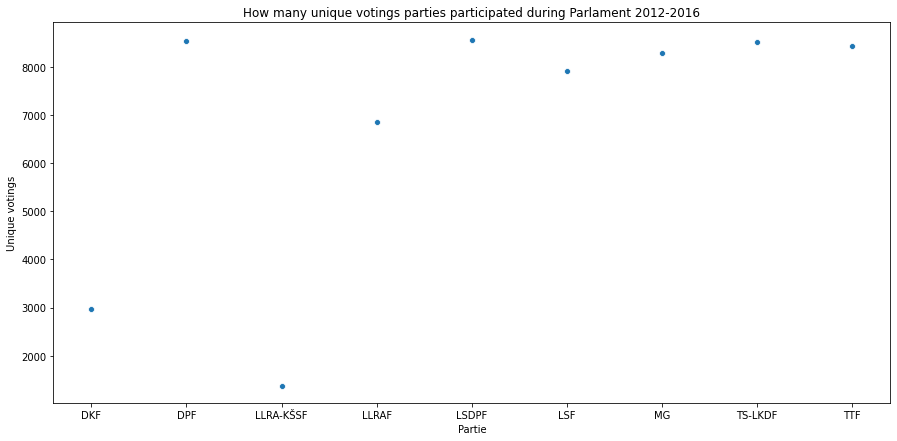

In [37]:
parties_12 = df_S_12.groupby('group')['voting_id'].nunique()
df_scatter_1 = pd.DataFrame({'Partie':parties_12.index, 'Unique votings':parties_12.values})
#print(df_scatter_1.head(10))

plt.figure(figsize=(15,7))
plt.title("How many unique votings parties participated during Parlament 2012-2016")
plt.xlabel("")
plt.ylabel("")
sns.scatterplot(x=df_scatter_1['Partie'], y=df_scatter_1['Unique votings'])

In [ ]:
# NEXT LINE OF CODE CRASHES THE SESSION AFTER USING ALL RAM :)
#only_SG = df[['voter_id', 'voter', 'time_yyyy']].where(df['voter'] == 'Steponavičius Gintaras') & (df['time_yyyy'] == '2015')